# **Bank marketing campaigns**

## Disusun Oleh: 
###             1. CHRISTIAN TJOPUTERA
###             2. Ahmad Zaid Makarim
###             3. Ronny Sahat Martua Purba

## **1. Business Problem Statement**

### **1.1. Latar Belakang**

Dalam industri perbankan, penawaran produk melalui kampanye pemasaran seperti telemarketing merupakan salah satu strategi utama untuk meningkatkan pendapatan dan mempertahankan hubungan dengan nasabah. Namun, pendekatan yang kurang terarah dapat menyebabkan pemborosan sumber daya, rendahnya tingkat keberhasilan kampanye, dan ketidakpuasan pelanggan akibat komunikasi yang tidak relevan.

Salah satu produk yang ditawarkan melalui kampanye ini adalah **deposito berjangka (*term deposit*)**. Meskipun produk ini memiliki nilai yang tinggi bagi bank, hanya sebagian kecil nasabah yang merespon positif terhadap tawaran tersebut. Oleh karena itu, diperlukan pendekatan yang lebih **berbasis data** agar strategi pemasaran menjadi lebih efektif dan efisien.

### **1.2. Permasalahan Utama**
Bank menghadapi tantangan dalam menentukan **nasabah mana yang paling berpotensi untuk menerima tawaran deposito berjangka**. Tanpa sistem yang mampu memprediksi respons nasabah, bank cenderung menghabiskan banyak waktu dan biaya untuk menghubungi nasabah yang kemungkinan besar tidak tertarik, yang berdampak pada rendahnya ***Return on Investment (ROI)*** dari kampanye pemasaran.

### **1.3. Rumusan Masalah**
1. Bagaimana memprediksi apakah seorang nasabah akan menerima tawaran deposito berjangka sehingga bank dapat mengoptimalkan upaya pemasaran, meningkatkan efisiensi kampanye, dan mengurangi biaya operasional?
2. Nasabah seperti apa yang sebaiknya ditargetkan untuk meningkatkan tingkat keberhasilan kampanye pemasaran produk deposito berjangka dan memaksimalkan **ROI**?

### **1.4. Tujuan**
1. **Mengembangkan model prediktif berbasis *machine learning*** untuk memproyeksikan kemungkinan seorang nasabah menerima tawaran produk deposito.

2. **Mengidentifikasi karakteristik nasabah yang memiliki potensi tinggi untuk berlangganan**, guna menyusun strategi segmentasi dan targeting yang lebih efektif.

3. **Memberikan *insight* berbasis data** untuk mendukung pengambilan keputusan dalam perencanaan dan pelaksanaan kampanye pemasaran.

### **1.5. Manfaat Bisnis**
1. **Meningkatkan rasio konversi** dari kampanye telemarketing.

2. **Mengurangi biaya** operasional dan sumber daya yang terbuang untuk nasabah yang tidak potensial.

3. **Meningkatkan kepuasan pelanggan** dengan komunikasi yang lebih relevan dan personal.

4. **Memaksimalkan laba atas investasi (*ROI*)** dari aktivitas pemasaran.

## **2. Data Understanding**

### **2.1. Sumber Data**

Sumber data
1. Tautan: https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset/code
2. Judul: ***Bank marketing campaigns dataset | Opening Deposit***

Dataset ini berisi data hasil kampanye pemasaran yang dilakukan oleh sebuah bank di **Portugal**. Kampanye tersebut sebagian besar dilakukan melalui **telepon langsung (*telemarketing*)** kepada nasabah, dengan tujuan untuk menawarkan produk **deposito berjangka (*term deposit*)**.

Jika setelah seluruh upaya pemasaran nasabah menyetujui untuk membuka deposito, maka **variabel target** diberi label `yes`, dan jika tidak, maka diberi label `no`.

### **2.2. Dimesi Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display, HTML
from tabulate import tabulate

In [41]:
file_path = "../data/bank-additional-full.csv"
df = pd.read_csv(file_path, sep=';') 

In [42]:
df_shape = df.shape
df_dtypes = df.dtypes
df_head = df.head()

In [81]:
baris, kolom = df.shape
display(Markdown(f"**Dataset ini mempunyai:**\n- Jumlah data/baris: `{baris}`\n- Jumlah atribut/kolom: `{kolom}`"))

**Dataset ini mempunyai:**
- Jumlah data/baris: `41188`
- Jumlah atribut/kolom: `21`

### **2.3. Informasi Atribut**

In [72]:
# 1. Ambil tipe data asli dari DataFrame
df_dtypes = pd.DataFrame(df.dtypes, columns=['Data Type']).reset_index()
df_dtypes.columns = ['Attribute', 'Data Type']

# 2. Buat deskripsi tambahan manual (dari informasi yang Anda berikan)
deskripsi_manual = [
    ["age", "Numerik", "Usia klien"],
    ["job", "Kategorikal", "Jenis Pekerjaan Klien"],
    ["marital", "Kategorikal", "Status Pernikahan Klien"],
    ["education", "Kategorikal", "Tingkat pendidikan klien"],
    ["default", "Kategorikal", "Status kredit klien"],
    ["housing", "Kategorikal", "Status apakah klien memiliki pinjamanan perumahan"],
    ["loan", "Kategorikal", "Status apakah klien memiliki pinjaman pribadi"],
    ["contact", "Kategorikal", "Jenis komunikasi kontak terakhir"],
    ["month", "Kategorikal", "Bulan kontak terakhir dengan klien dalam tahun ini"],
    ["day_of_week", "Kategorikal", "Hari dalam seminggu kontak terakhir dengan klien"],
    ["duration", "Numerikal", "Durasi kontak terakhir dengan klien dalam detik"],
    ["campaign", "Numerikal", "Jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini"],
    ["pdays", "Numerikal", "Jumlah hari sejak klien terakhir kali dihubungi dari kampanye sebelumnya"],
    ["previous", "Numerikal", "Jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini"],
    ["poutcome", "Kategorikal", "Hasil dari kampanye pemasaran sebelumnya"],
    ["emp.var.rate", "Numerikal", "Tingkat variasi pekerjaan"],
    ["cons.price.idx", "Numerikal", "Indeks harga konsumen"],
    ["cons.conf.idx", "Numerikal", "Indeks kepercayaan konsumen"],
    ["euribor3m", "Numerikal", "Tingkat euribor 3 bulan"],
    ["nr.employed", "Numerikal", "Jumlah karyawan"],
    ["y", "Kategorikal", "Status apakah klien telah berlangganan deposito berjangka?"]
]

df_deskripsi = pd.DataFrame(deskripsi_manual, columns=["Attribute", "Jenis Data", "Deskripsi"])

# 3. Gabungkan kedua DataFrame berdasarkan kolom 'Attribute'
df_info_akhir = pd.merge(df_dtypes, df_deskripsi, on="Attribute", how="left")


# 4. Tampilkan hasil
# Buat HTML dari DataFrame tanpa index
html_table = df_info_akhir.to_html(index=False)

# Tambahkan atribut style langsung ke tag <th> dan <td>
html_table = html_table.replace(
    "<th>", '<th style="text-align: center; padding: 8px; background-color: #f2f2f2;">'
).replace(
    "<td>", '<td style="text-align: left; padding: 6px;">'
)

# Bungkus tabel agar tampil di tengah layar
html_centered = f"""
<div style="display: flex; justify-content: center;">
    {html_table}
</div>
"""

# Tampilkan hasil
display(HTML(html_centered))

Attribute,Data Type,Jenis Data,Deskripsi
age,int64,Numerik,Usia klien
job,object,Kategorikal,Jenis Pekerjaan Klien
marital,object,Kategorikal,Status Pernikahan Klien
education,object,Kategorikal,Tingkat pendidikan klien
default,object,Kategorikal,Status kredit klien
housing,object,Kategorikal,Status apakah klien memiliki pinjamanan perumahan
loan,object,Kategorikal,Status apakah klien memiliki pinjaman pribadi
contact,object,Kategorikal,Jenis komunikasi kontak terakhir
month,object,Kategorikal,Bulan kontak terakhir dengan klien dalam tahun ini
day_of_week,object,Kategorikal,Hari dalam seminggu kontak terakhir dengan klien


### **2.4 Cuplikan Data**

In [75]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### **2.5. Pembersihan Data Duplikasi**

#### **2.5.1. Pemeriksaan Data Duplikasi**

In [94]:
duplicate_rows_size = df.duplicated(keep=False).sum()
display(Markdown(f"Dataset ini mempunyai **{duplicate_rows_size}** data duplikat."))

Dataset ini mempunyai **24** data duplikat.

In [95]:
# Ambil baris-baris yang duplikat
duplicate_rows = df[df.duplicated(keep=False)]

# Tampilkan seluruh baris duplikat dalam bentuk tabel
display(duplicate_rows) 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [104]:
# Ambil semua baris yang merupakan duplikat (baik salinan pertama maupun selanjutnya)
duplicate_rows_all = df[df.duplicated(keep=False)]

# Ambil hanya satu baris unik dari setiap grup duplikat
duplicate_rows_distinct = duplicate_rows_all.drop_duplicates()

# Hitung jumlah baris unik yang termasuk duplikat
duplicate_rows_distinct_size = duplicate_rows_distinct.shape[0]

# Tampilkan informasinya
display(Markdown(f"Dataset ini mempunyai **{duplicate_rows_distinct_size}** baris duplikat yang unik (distinct)."))


Dataset ini mempunyai **12** baris duplikat yang unik (distinct).

In [106]:
# Tampilkan dalam bentuk tabel
display(duplicate_rows_distinct)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


#### **2.5.2. Penghapusan Data Duplikasi**

In [108]:
# Remove duplicate rows and keep only the first occurrence
df_no_duplicates = df.drop_duplicates(keep='first')

# Save the cleaned DataFrame to a new CSV file
output_path = "../data/revision/bank-additional-full-no-duplicates.csv"
df_no_duplicates.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-no-duplicates.csv**

#### **2.5.3. Pembacaan Ulang DataFrame**

In [139]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [110]:
baris, kolom = df.shape
display(Markdown(f"**Setelah Pemeriksaan Duplikasi Data. Dataset ini mempunyai:**\n- Jumlah data/baris: `{baris}`\n- Jumlah atribut/kolom: `{kolom}`"))

**Setelah Pemeriksaan Duplikasi Data. Dataset ini mempunyai:**
- Jumlah data/baris: `41176`
- Jumlah atribut/kolom: `21`

## **3. Exploratory Data Analysis**

### **3.1 Distribusi Target (`y`)**

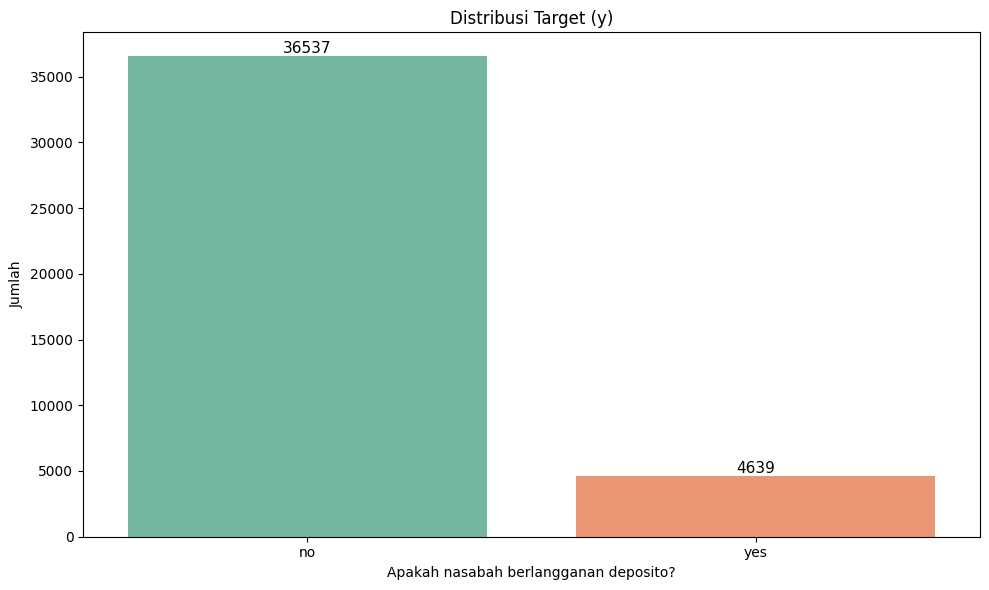

In [116]:
plt.figure(figsize=(10, 6))

# Buat countplot
ax = sns.countplot(data=df, x='y', hue='y', palette='Set2', legend=False)

# Tambahkan label dalam format bilangan bulat di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',                # Format sebagai integer
                (p.get_x() + p.get_width() / 2, height),  # Posisi
                ha='center', va='bottom', fontsize=11)

# Judul dan label
plt.title('Distribusi Target (y)')
plt.xlabel('Apakah nasabah berlangganan deposito?')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

Hasil:
Terdapat klasifikasi tidak seimbang, mayoritas nasabah tidak berlangganan deposito (`no` lebih banyak dari `yes`).

### **3.2. Distribusi Numerik**

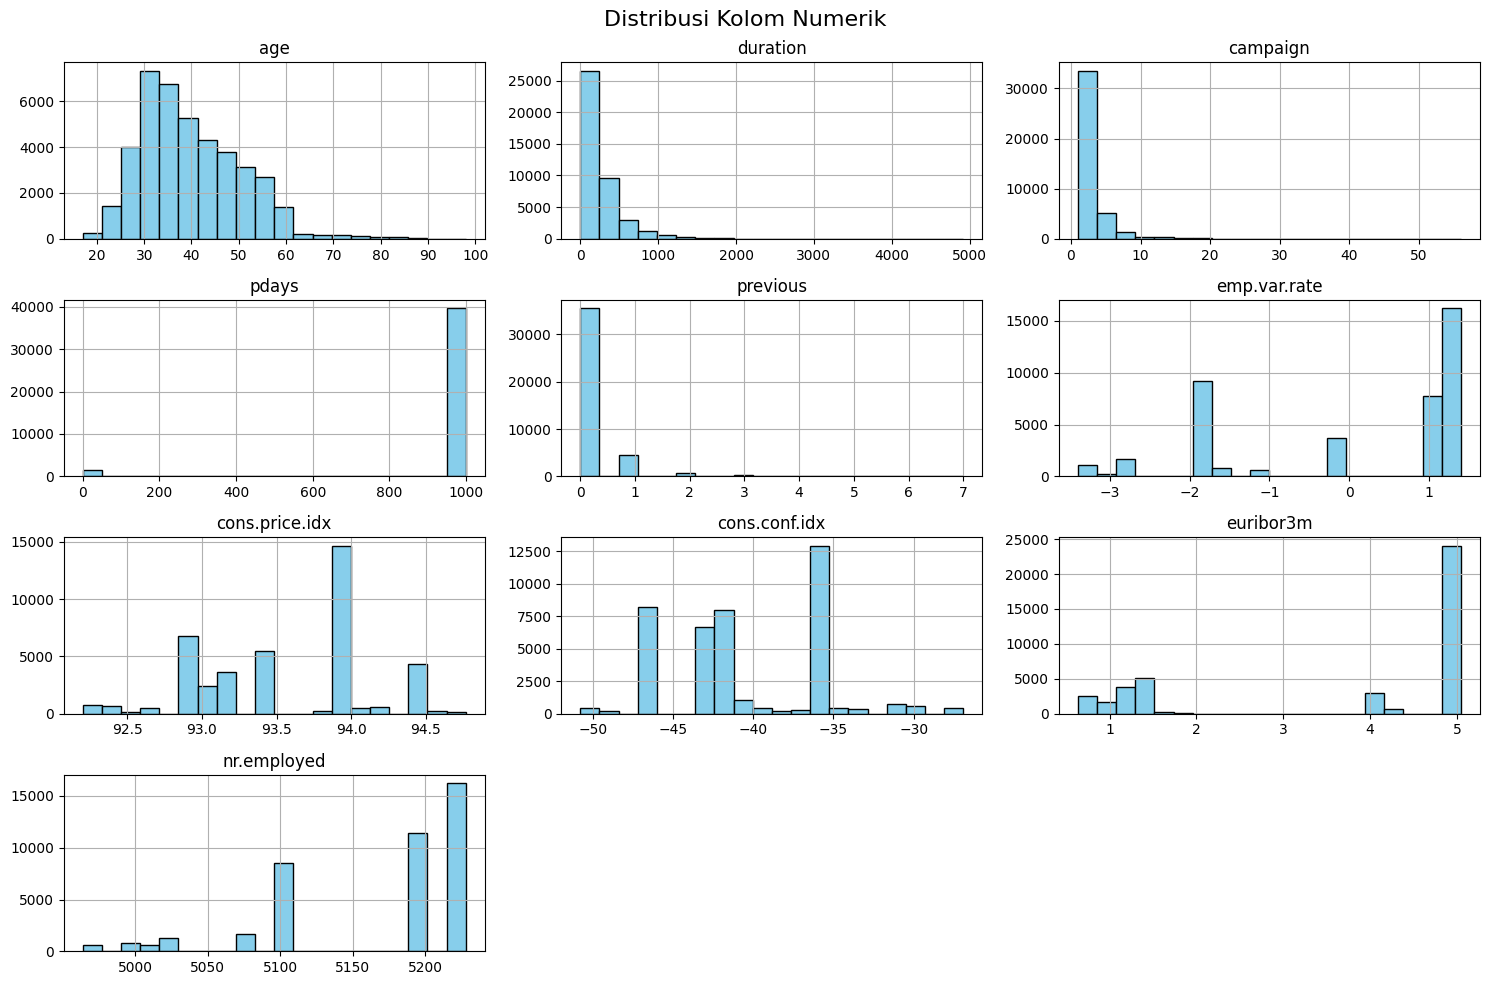

In [118]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Kolom Numerik', fontsize=16)
plt.tight_layout()
plt.show()


Insight:

* `duration` memiliki distribusi yang right-skewed.

* `campaign`, `previous`, dan `pdays` menunjukkan distribusi yang tidak normal.

### **3.3. Korelasi Antar Variabel Numerik**

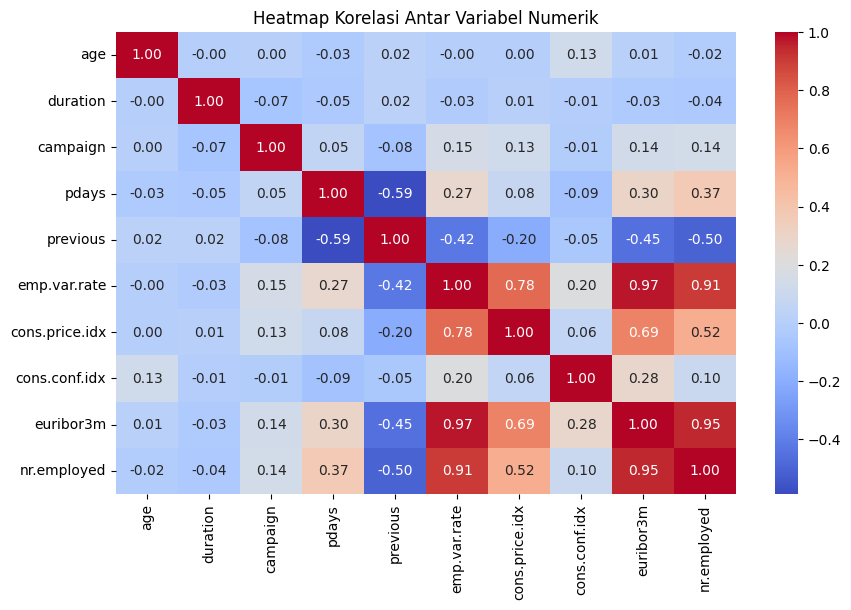

In [119]:
corr = df[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

Insight:

* `euribor3m` dan `nr.employed` memiliki korelasi positif tinggi.

* `emp.var.rate` negatif terhadap `cons.conf.idx` dan `euribor3m`.

### **3.4. Distribusi Kategori terhadap Target**

#### **3.4.1. Atribut `job`**

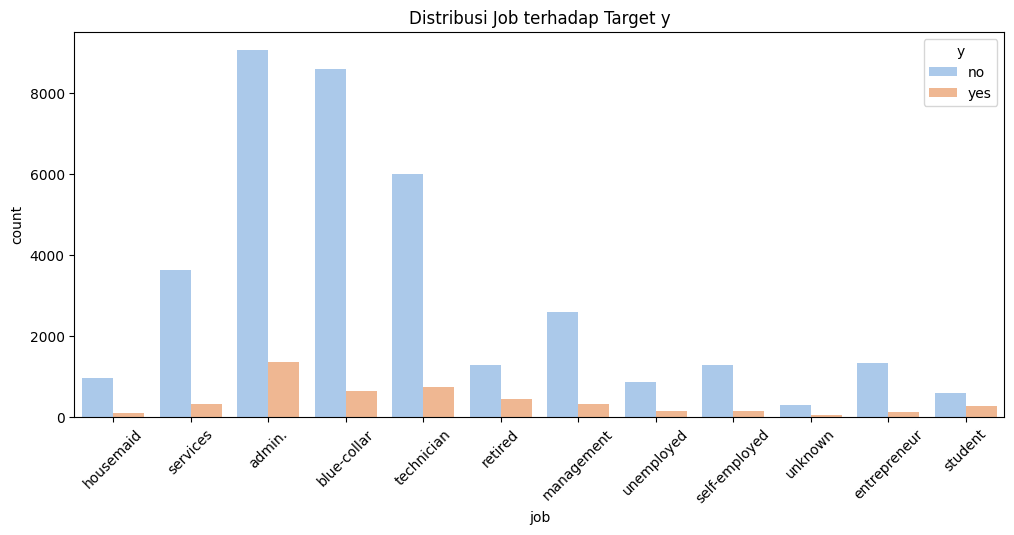

In [121]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='job', hue='y', palette='pastel')
plt.title('Distribusi Job terhadap Target y')
plt.xticks(rotation=45)
plt.show()


Insight:

Profesi seperti admin., technician, blue-collar banyak dihubungi, tapi konversi (yes) lebih tinggi pada students dan retired

### **3.5. EDA untuk Semua Variabel Kategorikal**

#### **3.5.1. Distribusi `job` terhadap `y`**

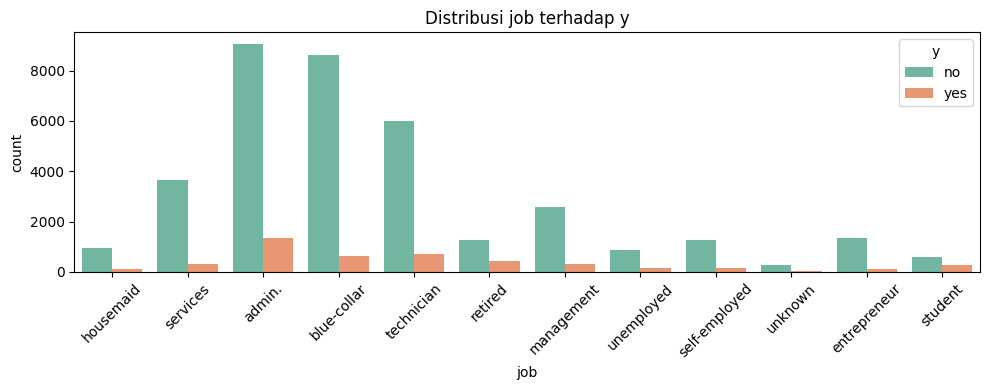

#### **3.5.2. Distribusi `marital` terhadap `y`**

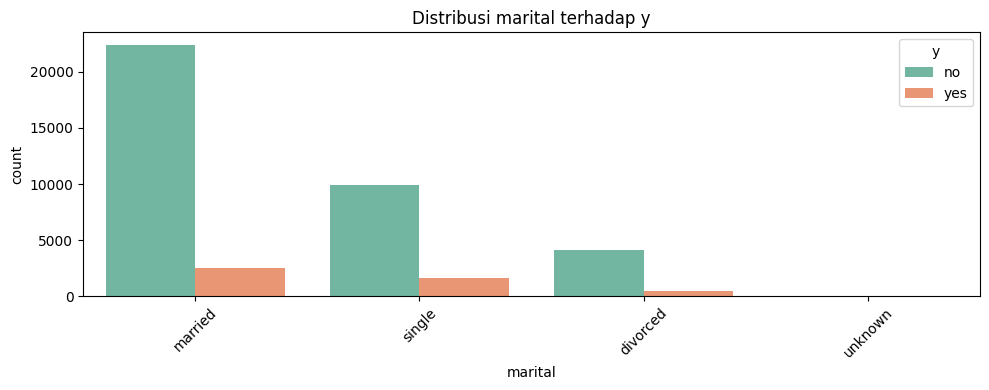

#### **3.5.3. Distribusi `education` terhadap `y`**

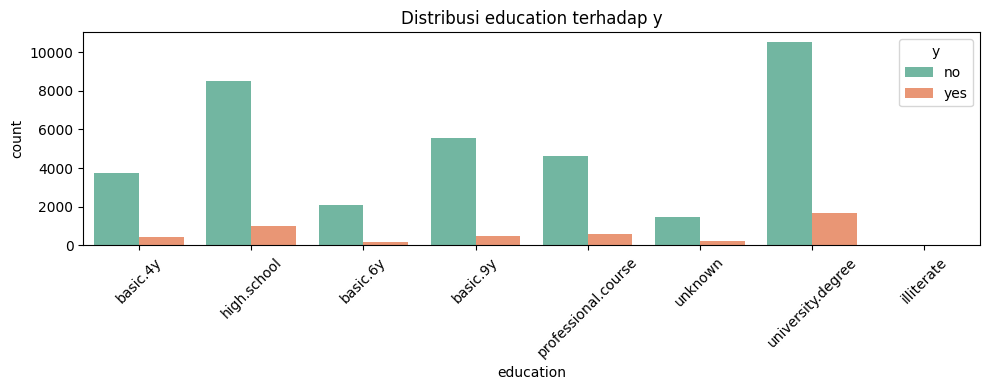

#### **3.5.4. Distribusi `default` terhadap `y`**

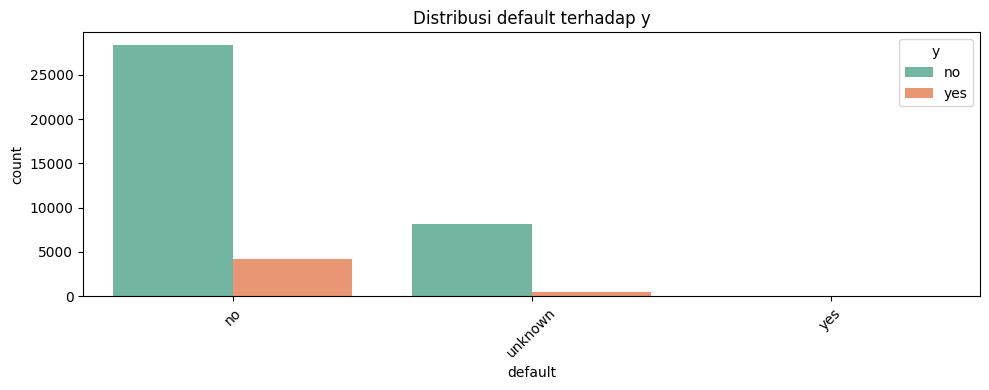

#### **3.5.5. Distribusi `housing` terhadap `y`**

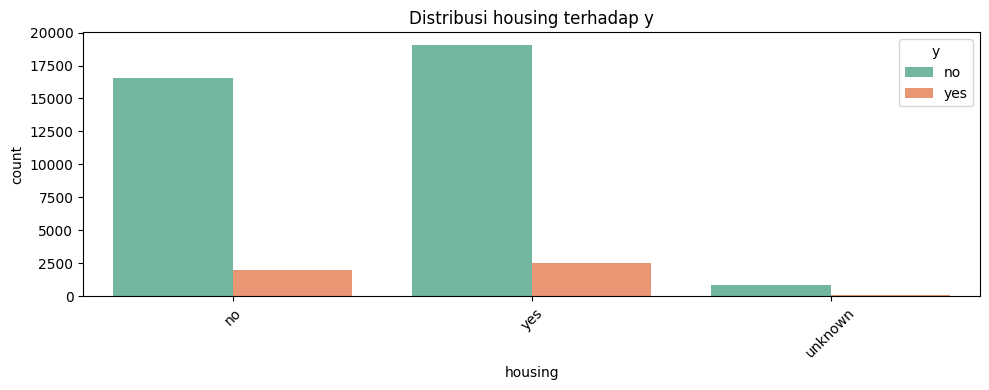

#### **3.5.6. Distribusi `loan` terhadap `y`**

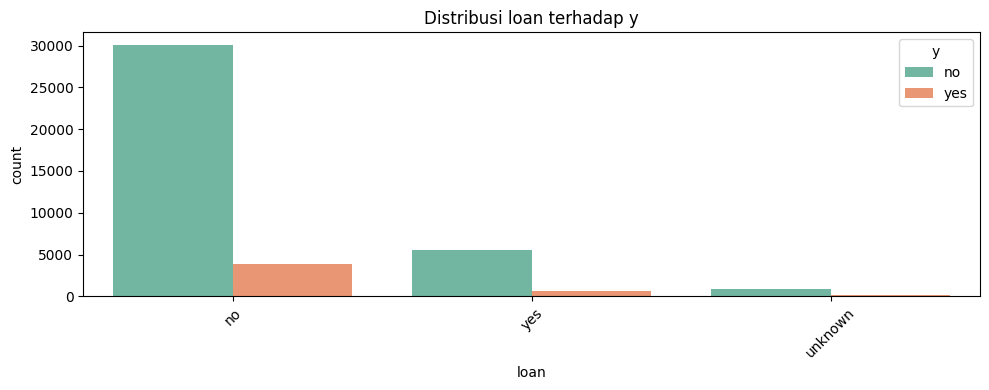

#### **3.5.7. Distribusi `contact` terhadap `y`**

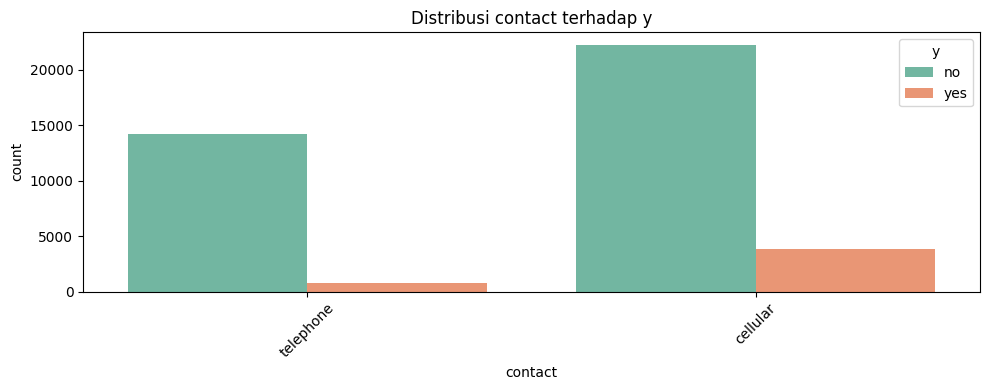

#### **3.5.8. Distribusi `month` terhadap `y`**

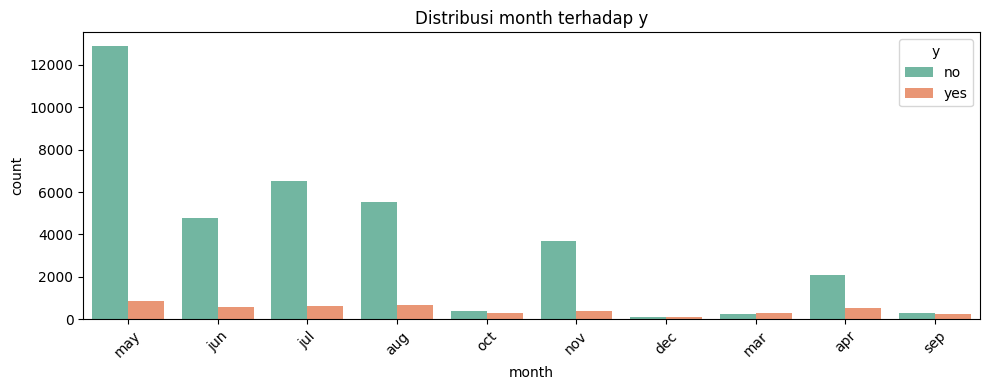

#### **3.5.9. Distribusi `day_of_week` terhadap `y`**

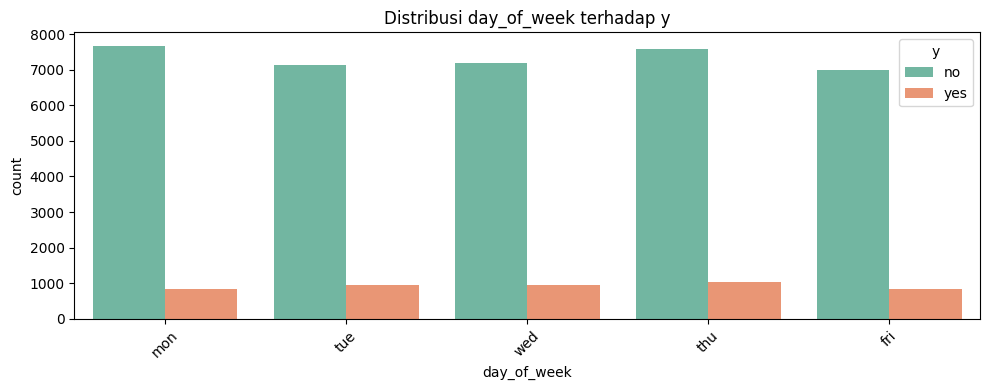

#### **3.5.10. Distribusi `poutcome` terhadap `y`**

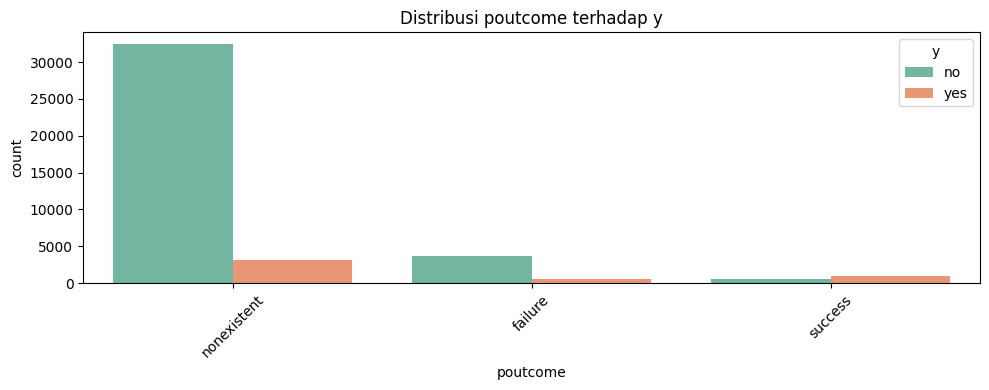

In [137]:
categorical_cols = df.select_dtypes(include='object').columns.drop('y')

bab = "3.5."
index = 1
for col in categorical_cols:
    display(Markdown(f"#### **{bab}{index}. Distribusi `{col}` terhadap `y`**"))
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, hue='y', palette='Set2')
    plt.title(f'Distribusi {col} terhadap y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    index = index + 1


### **3.6. Kesimpulan Sementara dari EDA:**
    
1. Target (`y`) sangat tidak seimbang, perlu penanganan saat modeling (misalnya **SMOTE** atau **class weight**).

2. Fitur `duration` **sangat berpengaruh** terhadap target, tapi **tidak bisa digunakan saat prediksi real-time** karena nilainya diketahui setelah telepon selesai.

3. Fitur seperti `poutcome`, `contact`, `education`, dan `job` memiliki **pengaruh signifikan terhadap konversi**.

4. Data **bersih** (tidak ada *missing values*), dan telah dihilangkan duplikat.

## **4. Preprocessing**

### **4.1. Missing Value**

In [140]:
# 1. Cek missing values
missing = df.isnull().sum()
missing_cols = missing[missing > 0]
display(missing_cols)

Series([], dtype: int64)

In [141]:
display(Markdown("✅ **Tidak ditemukan missing value dalam dataset.** Semua data lengkap."))


✅ **Tidak ditemukan missing value dalam dataset.** Semua data lengkap.

### **4.2. Casting**

In [142]:
# Tampilkan tipe data sebelum casting
print("Sebelum casting:")
display(df.dtypes)

# 1. Konversi kolom kategorikal dari object ke 'category'
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].astype('category')

# 2. Jika ada kolom numerik yang masih object (misalnya hasil impor yang salah)
# Bisa dicek dan diubah misalnya:
# df['some_column'] = pd.to_numeric(df['some_column'], errors='coerce')

# Tampilkan tipe data sesudah casting
print("\nSesudah casting:")
display(df.dtypes)


Sebelum casting:


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


Sesudah casting:


age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

### **4.3. Inconsistent Variable**

In [143]:
# Salin data sebelum pembersihan
df_cleaned = df.copy()

# Ambil semua kolom kategorikal
categorical_cols = df_cleaned.select_dtypes(include='category').columns

# Lakukan pembersihan nilai
for col in categorical_cols:
    # Cek jika kolom memiliki string
    df_cleaned[col] = df_cleaned[col].str.lower().str.strip()

# Tampilkan contoh hasil pembersihan
for col in categorical_cols:
    unique_vals = df[col].unique()
    unique_cleaned = df_cleaned[col].unique()
    if set(unique_vals) != set(unique_cleaned):
        print(f"🔁 Kolom `{col}` sebelum: {sorted(unique_vals)}")
        print(f"✅ Kolom `{col}` sesudah: {sorted(unique_cleaned)}\n")


### **4.4. Remove data duplication**

In [144]:
# Cek jumlah baris duplikat
duplicate_count = df_cleaned.duplicated().sum()
print(f"Jumlah baris duplikat ditemukan: {duplicate_count}")

# Tampilkan beberapa baris duplikat (jika ada)
if duplicate_count > 0:
    display(df_cleaned[df_cleaned.duplicated()].head())

# Hapus duplikat
df_cleaned = df_cleaned.drop_duplicates()

# Verifikasi ulang
print(f"Jumlah data setelah duplikasi dihapus: {df_cleaned.shape[0]} baris")


Jumlah baris duplikat ditemukan: 0
Jumlah data setelah duplikasi dihapus: 41176 baris


### **4.5. Feature Engineering**

In [146]:
import numpy as np

# Salin dataframe untuk feature engineering
df_fe = df_cleaned.copy()

# 1. Hapus kolom 'duration' karena tidak valid untuk prediksi real-time
df_fe = df_fe.drop(columns=['duration'])

# 2. Tambahkan fitur 'contacted_before' dari pdays
df_fe['contacted_before'] = np.where(df_fe['pdays'] != 999, 'yes', 'no')

# 3. Tambahkan fitur 'many_contacts' jika campaign > rata-rata
campaign_mean = df_fe['campaign'].mean()
df_fe['many_contacts'] = np.where(df_fe['campaign'] > campaign_mean, 'yes', 'no')

# 4. Konversi hasil ke tipe kategori
df_fe['contacted_before'] = df_fe['contacted_before'].astype('category')
df_fe['many_contacts'] = df_fe['many_contacts'].astype('category')


In [147]:
df_fe[['pdays', 'contacted_before', 'campaign', 'many_contacts']].head(10)


,pdays,contacted_before,campaign,many_contacts
0,999,no,1,no
1,999,no,1,no
2,999,no,1,no
3,999,no,1,no
4,999,no,1,no
5,999,no,1,no
6,999,no,1,no
7,999,no,1,no
8,999,no,1,no
9,999,no,1,no


In [148]:
# Contoh: gabungan antara housing, loan, dan default
df_fe['risk_profile'] = df_fe['housing'].astype(str) + "_" + df_fe['loan'].astype(str) + "_" + df_fe['default'].astype(str)
df_fe['risk_profile'] = df_fe['risk_profile'].astype('category')


In [149]:
df_fe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacted_before,many_contacts,risk_profile
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,no,no_no_no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,no,no_no_unknown
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,no,yes_no_no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,no,no_no_no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,no,no_yes_no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,no,no,yes_no_no
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,no,no,no_no_no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,no,no,yes_no_no
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,no,no,no_no_no


In [3]:
output_path = "../data/revision/bank-additional-full-eda.csv"

In [151]:
output_path = "../data/revision/bank-additional-full-eda.csv"
df_fe.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

df = pd.read_csv(output_path, sep=';')

Data akan disimpan di **../data/revision/bank-additional-full-eda.csv**

In [4]:
df = pd.read_csv(output_path, sep=';')

## **5. Methodology (Modeling/Analysis)**

### **5.1. Analysis Paradigm**

### **5.2. Analysis Structure**

### **5.3. Expected Analysis Results**

## **6. Conclusion and Recommendation**

### **6.1. Conclusion**

### **6.2. Recommendation**

# **CORETAN**

## **1. Persiapan Data (Data Splitting & Encoding)**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Salin data akhir dari hasil feature engineering
df_ml = df.copy()

# Pisahkan fitur dan target
X = df_ml.drop(columns='y')
y = df_ml['y']

# Encoding target ('yes'=1, 'no'=0)
y = y.map({'no': 0, 'yes': 1})

# One-hot encoding fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

# Split data latih & uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [153]:
X_train

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,risk_profile_no_no_yes,risk_profile_no_yes_no,risk_profile_no_yes_unknown,risk_profile_unknown_unknown_no,risk_profile_unknown_unknown_unknown,risk_profile_yes_no_no,risk_profile_yes_no_unknown,risk_profile_yes_no_yes,risk_profile_yes_yes_no,risk_profile_yes_yes_unknown
36444,24,2,999,1,-2.9,92.963,-40.8,1.262,5076.2,False,...,False,False,False,False,False,False,False,False,False,False
1233,32,1,999,0,1.1,93.994,-36.4,4.855,5191.0,True,...,False,False,False,False,False,False,False,False,False,False
24104,33,1,999,0,-0.1,93.200,-42.0,4.245,5195.8,False,...,False,False,False,False,False,False,False,False,False,False
15513,38,4,999,0,1.4,93.918,-42.7,4.957,5228.1,False,...,False,True,False,False,False,False,False,False,False,False
17912,39,4,999,0,1.4,93.918,-42.7,4.961,5228.1,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33257,26,1,999,0,-1.8,92.893,-46.2,1.291,5099.1,False,...,False,False,False,False,False,False,False,False,False,False
22707,35,5,999,0,1.4,93.444,-36.1,4.964,5228.1,False,...,False,True,False,False,False,False,False,False,False,False
6970,32,1,999,0,1.1,93.994,-36.4,4.860,5191.0,False,...,False,False,False,False,False,True,False,False,False,False
18498,34,1,999,0,1.4,93.918,-42.7,4.968,5228.1,False,...,False,False,False,False,False,False,False,False,False,False


## **2. Membangun Model Klasifikasi (contoh: Logistic Regression, Decision Tree)**

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# 1. Skalakan X_train dan X_test
print("1. Skalakan X_train dan X_test")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Logistic Regression (menggunakan data yang telah diskalakan)
print("2. Logistic Regression (menggunakan data yang telah diskalakan)")
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_scaled, y_train)

# 3. Decision Tree (menggunakan data original, tanpa scaling)
print("3. Decision Tree (menggunakan data original, tanpa scaling)")
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
print("end")

1. Skalakan X_train dan X_test
2. Logistic Regression (menggunakan data yang telah diskalakan)
3. Decision Tree (menggunakan data original, tanpa scaling)
end


## **3. Evaluasi Model**

In [161]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prediksi
y_pred = logreg.predict(X_test)

# Evaluasi
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[   0 7308]
 [   0  928]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      7308
           1       0.11      1.00      0.20       928

    accuracy                           0.11      8236
   macro avg       0.06      0.50      0.10      8236
weighted avg       0.01      0.11      0.02      8236

Accuracy: 0.11267605633802817


/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sample

## SMOTE

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Terapkan SMOTE pada data latih yang sudah diskalakan
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# 2. Latih model dengan data hasil SMOTE
logreg_smote = LogisticRegression(max_iter=2000)
logreg_smote.fit(X_train_smote, y_train_smote)

# 3. Prediksi dan evaluasi di data test asli (tidak di-SMOTE)
y_pred_smote = logreg_smote.predict(X_test_scaled)

# 4. Tampilkan hasil evaluasi
print(classification_report(y_test, y_pred_smote, zero_division=0))


              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7308
           1       0.35      0.66      0.46       928

    accuracy                           0.82      8236
   macro avg       0.65      0.75      0.68      8236
weighted avg       0.88      0.82      0.85      8236



📋 Classification Report (Random Forest + SMOTE):

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7308
           1       0.48      0.38      0.42       928

    accuracy                           0.88      8236
   macro avg       0.70      0.66      0.68      8236
weighted avg       0.87      0.88      0.88      8236

end


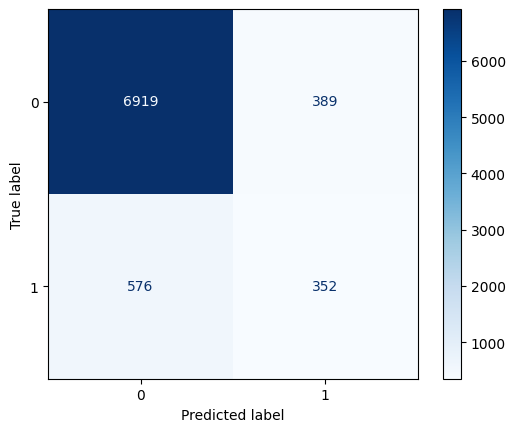

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Terapkan SMOTE pada data latih (tanpa scaling, karena Random Forest tidak butuh)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 2. Inisialisasi dan latih Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_smote, y_train_smote)

# 3. Prediksi di data uji asli
y_pred_rf = rf.predict(X_test)

# 4. Evaluasi performa
print("📋 Classification Report (Random Forest + SMOTE):\n")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# 5. Visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues")
print("end")

TUNING

📋 Classification Report (Random Forest + SMOTE, threshold = 0.3):

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7308
           1       0.38      0.57      0.46       928

    accuracy                           0.85      8236
   macro avg       0.66      0.73      0.68      8236
weighted avg       0.88      0.85      0.86      8236



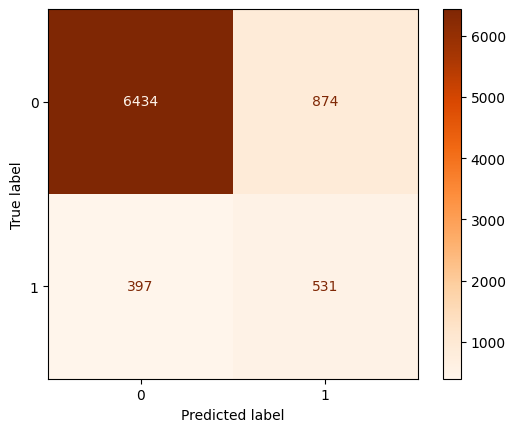

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Dapatkan probabilitas prediksi untuk kelas 1
y_proba_rf = rf.predict_proba(X_test)[:, 1]  # probabilitas kelas "1"

# 2. Tuning threshold (misalnya: 0.3)
threshold = 0.3
y_pred_thresh = (y_proba_rf >= threshold).astype(int)

# 3. Evaluasi hasil prediksi dengan threshold baru
print(f"📋 Classification Report (Random Forest + SMOTE, threshold = {threshold}):\n")
print(classification_report(y_test, y_pred_thresh, zero_division=0))

# 4. Tampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred_thresh)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Oranges")


Cari threshold optimal

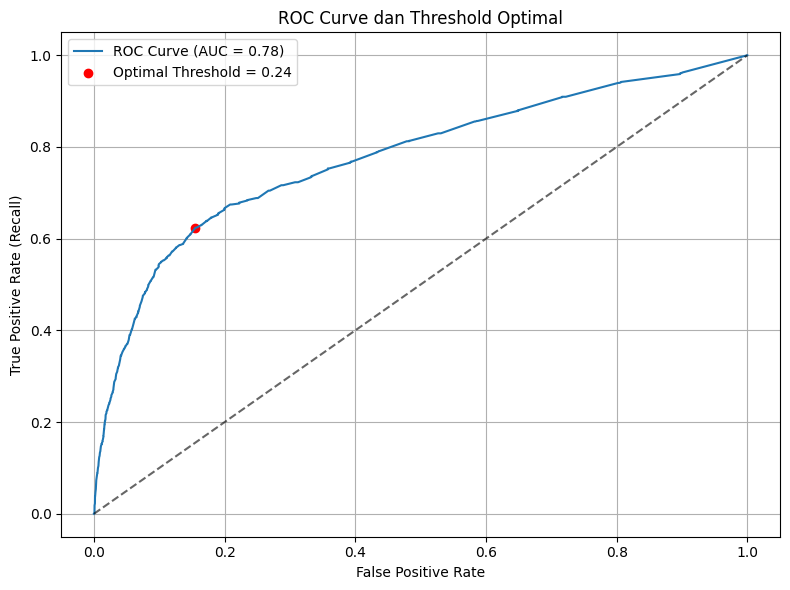

📌 Threshold optimal berdasarkan Youden's J: 0.24


In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Dapatkan probabilitas prediksi
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# 2. Hitung ROC dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)

# 3. Hitung Youden's J untuk semua threshold
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]

# 4. Visualisasi ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve dan Threshold Optimal')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 5. Tampilkan threshold terbaik
print(f"📌 Threshold optimal berdasarkan Youden's J: {optimal_threshold:.2f}")


Gunakan optimal_threshold untuk klasifikasi:

In [11]:
y_pred_opt = (y_proba_rf >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_opt, zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7308
           1       0.34      0.62      0.44       928

    accuracy                           0.82      8236
   macro avg       0.64      0.73      0.67      8236
weighted avg       0.88      0.82      0.84      8236



| Model                     | Threshold | Accuracy | Precision (Yes) | Recall (Yes) | F1-Score (Yes) |
| ------------------------- | --------- | -------- | --------------- | ------------ | -------------- |
| **Logistic + SMOTE**      | 0.50      | 0.82     | 0.35            | **0.66**     | 0.46           |
| **Random Forest + SMOTE** | 0.50      | **0.88** | **0.48**        | 0.38         | 0.42           |
| Random Forest + SMOTE     | 0.30      | 0.85     | 0.38            | 0.57         | **0.46**       |
| **Random Forest + SMOTE** | **0.24**  | 0.82     | 0.34            | **0.62**     | 0.44           |


🎯 Interpretasi Cepat:

* Akurasi tertinggi: ✅ Random Forest @ 0.5

* Recall terbaik (Yes): 🎯 Logistic @ 0.5 (66%) dan Random Forest @ 0.24 (62%)

* F1-Score terbaik (Yes): 🔥 Random Forest @ 0.3 (0.46)

* Trade-off: Threshold < 0.5 meningkatkan recall, tapi mengorbankan sedikit akurasi dan precision.

| Tujuan Bisnis Utama                                     | Rekomendasi                   |
| ------------------------------------------------------- | ----------------------------- |
| Ingin akurasi total tertinggi                           | Random Forest @ 0.5           |
| Ingin mendeteksi sebanyak mungkin `yes` (recall tinggi) | Logistic @ 0.5 atau RF @ 0.24 |
| Ingin keseimbangan terbaik antara precision & recall    | ✅ **Random Forest @ 0.3**     |


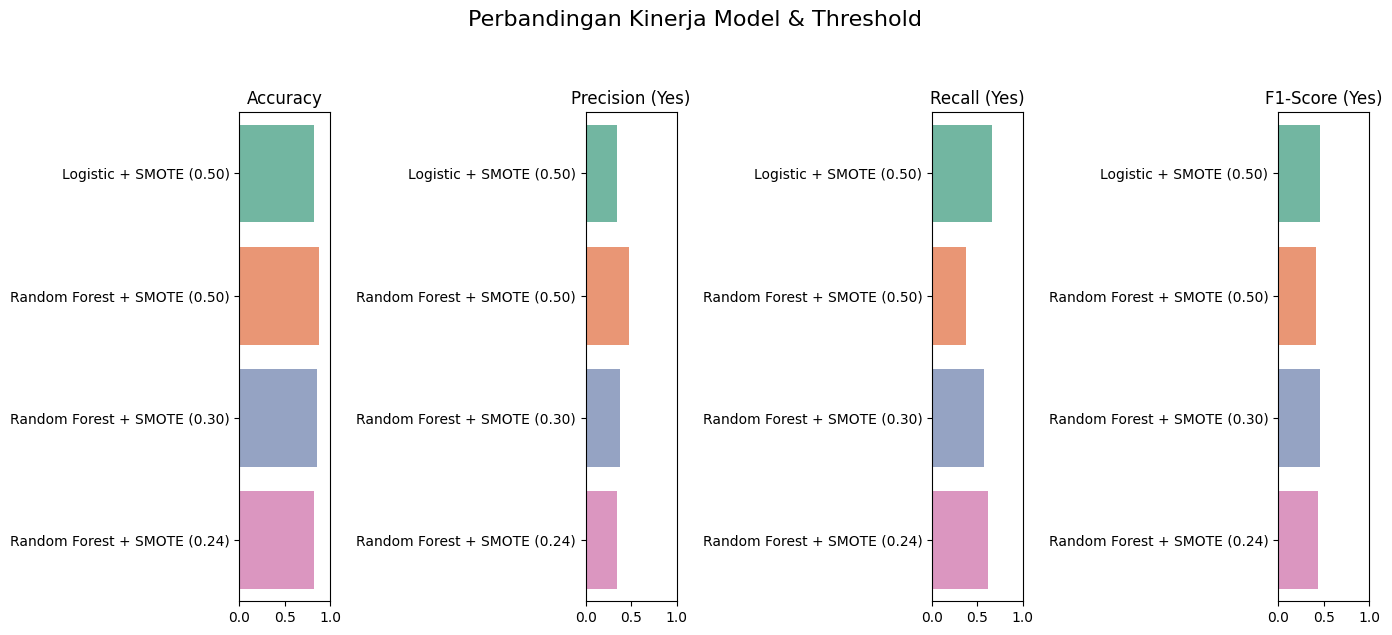

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'Model': [
        'Logistic + SMOTE (0.50)',
        'Random Forest + SMOTE (0.50)',
        'Random Forest + SMOTE (0.30)',
        'Random Forest + SMOTE (0.24)'
    ],
    'Accuracy': [0.82, 0.88, 0.85, 0.82],
    'Precision (Yes)': [0.35, 0.48, 0.38, 0.34],
    'Recall (Yes)': [0.66, 0.38, 0.57, 0.62],
    'F1-Score (Yes)': [0.46, 0.42, 0.46, 0.44]
}

df_compare = pd.DataFrame(data)

# Plot
metrics = ['Accuracy', 'Precision (Yes)', 'Recall (Yes)', 'F1-Score (Yes)']
plt.figure(figsize=(14, 6))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 4, i)
    sns.barplot(data=df_compare, x=metric, y='Model', hue='Model', palette='Set2', legend=False)
    plt.title(metric)
    plt.xlim(0, 1)
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()

plt.suptitle("Perbandingan Kinerja Model & Threshold", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


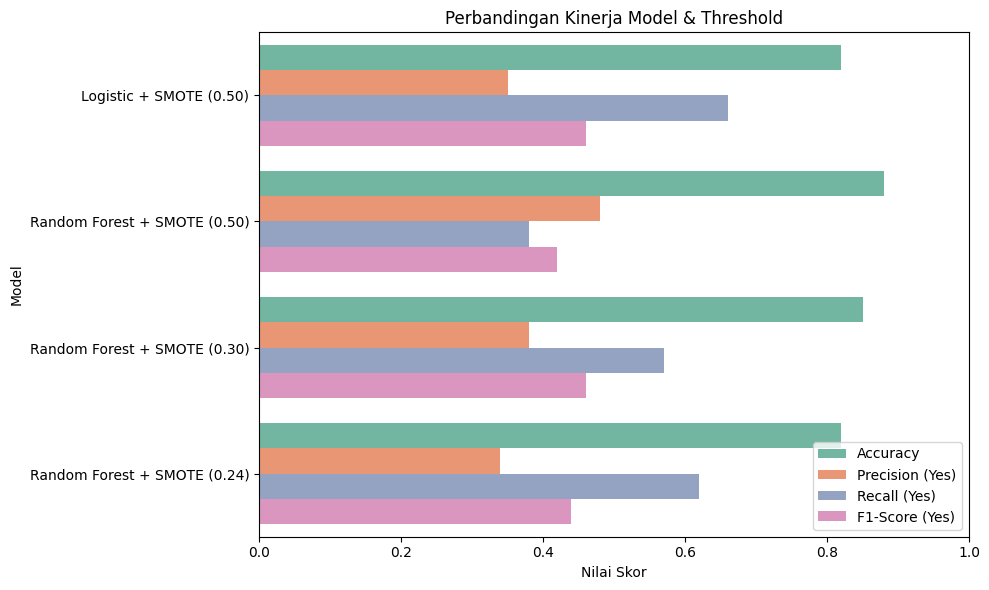

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'Model': [
        'Logistic + SMOTE (0.50)',
        'Random Forest + SMOTE (0.50)',
        'Random Forest + SMOTE (0.30)',
        'Random Forest + SMOTE (0.24)'
    ],
    'Accuracy': [0.82, 0.88, 0.85, 0.82],
    'Precision (Yes)': [0.35, 0.48, 0.38, 0.34],
    'Recall (Yes)': [0.66, 0.38, 0.57, 0.62],
    'F1-Score (Yes)': [0.46, 0.42, 0.46, 0.44]
}

df_compare = pd.DataFrame(data)
df_melt = df_compare.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melt, y='Model', x='Score', hue='Metric', palette='Set2')
plt.title('Perbandingan Kinerja Model & Threshold')
plt.xlim(0, 1)
plt.xlabel('Nilai Skor')
plt.ylabel('Model')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


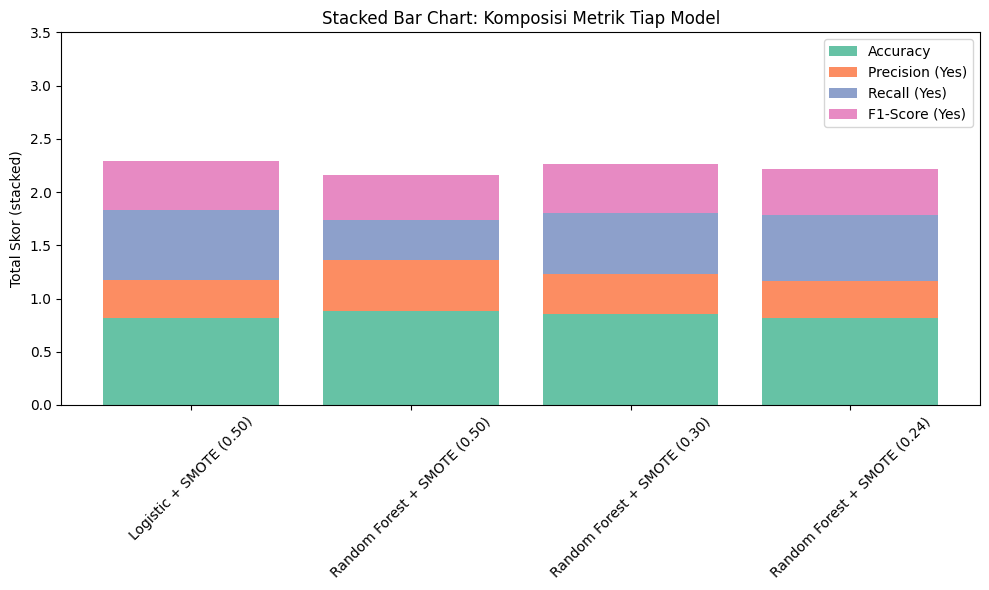

In [17]:
import numpy as np

# Data (ulang)
df = pd.DataFrame(data)
metrics = ['Accuracy', 'Precision (Yes)', 'Recall (Yes)', 'F1-Score (Yes)']
labels = df['Model']
bar_width = 0.6

# Stack preparation
bottom = np.zeros(len(df))
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    plt.bar(labels, df[metric], bottom=bottom, label=metric, color=colors[i])
    bottom += df[metric]

plt.title('Stacked Bar Chart: Komposisi Metrik Tiap Model')
plt.ylabel('Total Skor (stacked)')
plt.xticks(rotation=45)
plt.ylim(0, 3.5)  # max 4 karena 4 skor per model
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


1. Gabungkan seluruh data training dan test

In [18]:
# Gabungkan semua data
X_all = pd.concat([X_train, X_test])
y_all = pd.concat([y_train, y_test])


2. Skalakan data jika diperlukan (untuk konsistensi)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler_final = StandardScaler()
X_all_scaled = scaler_final.fit_transform(X_all)


3. Terapkan SMOTE untuk penyeimbangan data

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_all_smote, y_all_smote = smote.fit_resample(X_all_scaled, y_all)


4. Latih ulang Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_all_smote, y_all_smote)
print("end")

end


5. Simpan model & scaler

In [22]:
import joblib

joblib.dump(final_model, 'random_forest_final.pkl')
joblib.dump(scaler_final, 'scaler_final.pkl')
print("✅ Model dan scaler berhasil disimpan.")


✅ Model dan scaler berhasil disimpan.


Buat prediksi baru (model.predict)


In [25]:
# Load model dan scaler
final_model = joblib.load('random_forest_final.pkl')
scaler_final = joblib.load('scaler_final.pkl')


In [27]:
import joblib
joblib.dump(X_train.columns.tolist(), "saved_X_train_columns.pkl")


['saved_X_train_columns.pkl']